In [17]:
city = "Tampa"


In [18]:
import json
import statistics
s
i = 0

with open('tampa_not_chinese_reviews.json', 'r') as file:
    for line in file:
        business = json.loads(line)
        j = 0
        stars = []
        for key in business.keys():
            if j < 30:
                j +=1
                stars += [review['stars'] for review in business[key]]
        mean = statistics.mean(stars)
        mean = statistics.mean(stars)
        median = statistics.median(stars)
        std_dev = statistics.stdev(stars)
        min_value = min(stars)
        max_value = max(stars)

        # Display the statistics
        print("across 100 representative reviews for non-chinese restaurants in " + city)
        print("Mean:", mean)
        print("Median:", median)
        print("Standard Deviation:", std_dev)
        print("Minimum Value:", min_value)
        print("Maximum Value:", max_value)

across 100 representative reviews for non-chinese restaurants in Tampa
Mean: 3.7229287090558767
Median: 4.0
Standard Deviation: 1.4109093812562434
Minimum Value: 1.0
Maximum Value: 5.0


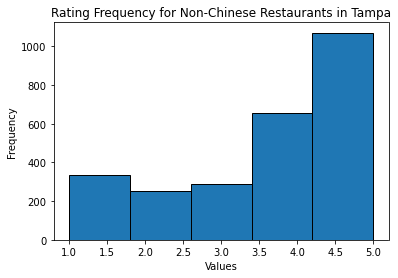

In [19]:
import matplotlib.pyplot as plt
plt.hist(stars, bins=5, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Rating Frequency for Non-Chinese Restaurants in ' + city)

plt.show()

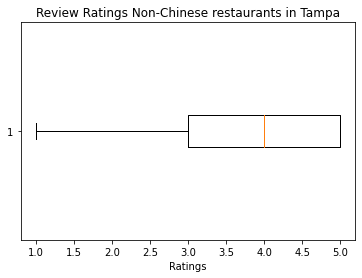

In [20]:
plt.boxplot(stars, vert=False)

plt.xlabel('Ratings')
plt.title('Review Ratings Non-Chinese restaurants in ' + city)

plt.show()

In [21]:
import json
import statistics


def get_stars(fname):
    i = 0
    with open(fname, 'r') as file:
        for line in file:
            business = json.loads(line)
            j = 0
            stars = []
            for key in business.keys():
                if j < 30:
                    j +=1
                    stars += [review['stars'] for review in business[key]]
            mean = statistics.mean(stars)
            median = statistics.median(stars)
            std_dev = statistics.stdev(stars)
            min_value = min(stars)
            max_value = max(stars)

            # # Display the statistics
            # print("across 100 representative reviews for every chinese restaurant in " + city)
            # print("Mean:", mean)
            # print("Median:", median)
            # print("Standard Deviation:", std_dev)
            # print("Minimum Value:", min_value)
            # print("Maximum Value:", max_value)
            return(stars)
        

In [22]:
plt.boxplot(chinese_stars, vert=False)

plt.xlabel('Ratings')
plt.title('Review Ratings across Chinese restaurants in ' + city)

plt.show()

NameError: name 'chinese_stars' is not defined

In [9]:

plt.hist(chinese_stars, bins=5, edgecolor='black')  # Adjust the number of bins as needed

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Rating Frequency of Chinese Restaurants in ' + city)
plt.show()

NameError: name 'chinese_stars' is not defined

In [11]:
import pandas as pd
import numpy as np
census_dataset = pd.read_csv('2020_Census_Data_Cities.csv') 
census_dataset.head(5)
census_dataset = census_dataset.drop(columns=['Total population'])






<AxesSubplot:title={'center':'Stacked Bar Graph'}, ylabel='City'>

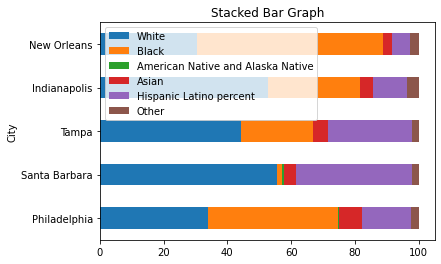

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
  
census_dataset.plot( 
    x = 'City', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True) 

In [10]:
from scipy import stats
t_statistic, p_value = stats.ttest_ind(stars, chinese_stars)

print("T-TEST STAT: ", t_statistic)
print("T-TEST PVALUE: ", p_value)

T-TEST STAT:  5.612415464107878
T-TEST PVALUE:  2.1336092063570666e-08


In [14]:
ethnicity_columns = ['White', 'Black', 'American Native and Alaska Native', 'Asian', 'Hispanic Latino percent', 'Other']

# Calculate the Diversity Index for each row and add it as a new column 'DI'
census_dataset['DI'] = 1 - census_dataset[ethnicity_columns].apply(lambda row: sum((row/100) ** 2), axis=1)


census_dataset.head(5)


,City,White,Black,American Native and Alaska Native,Asian,Hispanic Latino percent,Other,DI
0,Philadelphia,33.8,40.8,0.3,7.4,15.4,2.3,0.689562
1,Santa Barbara,55.5,1.7,0.7,3.7,36.2,2.2,0.558740
2,Tampa,44.4,22.4,0.2,4.6,26.2,2.2,0.681440
3,Indianapolis,52.7,28.8,0.2,3.9,10.8,3.6,0.624842
4,New Orleans,30.6,58.1,0.2,2.7,5.6,2.8,0.564150


In [15]:
cities = census_dataset['City'] 
chinese_json = []
not_chinese_json = []
for each in cities:
    chinese_json.append(each.replace(" ", "_").lower()+'_chinese_reviews.json')
    not_chinese_json.append(each.replace(" ", "_").lower()+'_not_chinese_reviews.json')
    
    
# nch_mean_stars = []
# for nch in not_chinese_json:
#     nch_mean_stars.append(statistics.mean(get_stars(nch)))
# census_dataset['Mean Non-Chinese Stars'] = nch_stars 

# ch_mean_stars = []
# for ch in chinese_json:
#     ch_mean_stars.append(statistics.mean(get_stars(ch)))
nch_mean_stars = []
ch_mean_stars = []
t_values = []
p_values = []
stars_city_dict = {}
for i in range(0,5):
    chinese_stars = get_stars(chinese_json[i])
    non_chinese_stars = get_stars(not_chinese_json[i])
    nch_mean_stars.append(statistics.mean(non_chinese_stars))
    ch_mean_stars.append(statistics.mean(chinese_stars))
    t_statistic, p_value = stats.ttest_ind(non_chinese_stars, chinese_stars)
    t_values.append(t_statistic)
    p_values.append(p_value)
    stars_city_dict[cities[i]+" nch"] = non_chinese_stars
    stars_city_dict[cities[i]+" ch"] = chinese_stars

census_dataset['Mean Non-Chinese Stars'] = nch_mean_stars
census_dataset['Mean Chinese Stars'] = ch_mean_stars

census_dataset['T-test score'] = t_values

census_dataset['P-val'] = p_values
census_dataset.to_csv('city_di_star_processed.csv', index=False)
    
census_dataset.head(5)

NameError: name 'stats' is not defined

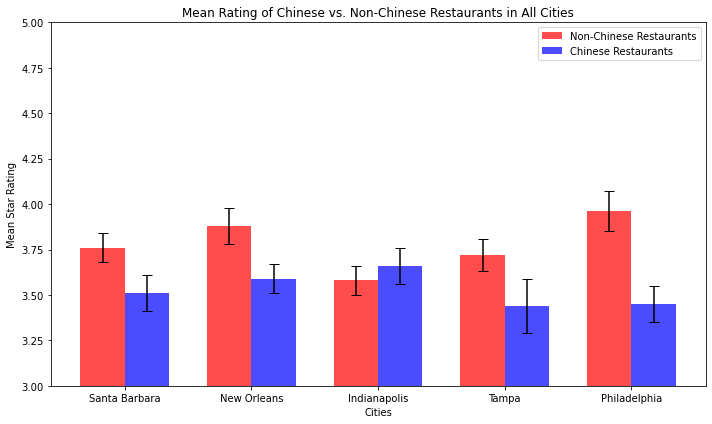

In [15]:

cities = ["Santa Barbara", "New Orleans", "Indianapolis", "Tampa", "Philadelphia"]
chinese_ratings = [3.51, 3.59, 3.66, 3.44, 3.45]  
non_chinese_ratings = [3.76, 3.88, 3.58, 3.72, 3.96] 

chinese_errors = [0.1, 0.08, 0.1, 0.15, 0.1]  
non_chinese_errors = [0.08, 0.1, 0.08, 0.09, 0.11]  

x = np.arange(len(cities))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, non_chinese_ratings, bar_width, label='Non-Chinese Restaurants', color='red', alpha=0.7, yerr=non_chinese_errors, capsize=5)
plt.bar(x + bar_width/2, chinese_ratings, bar_width, label='Chinese Restaurants', color='blue', alpha=0.7, yerr=chinese_errors, capsize=5)

plt.xticks(x, cities)
plt.ylim(3.0, 5.0)

plt.xlabel('Cities')
plt.ylabel('Mean Star Rating')
plt.title('Mean Rating of Chinese vs. Non-Chinese Restaurants in All Cities')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
di_star_df = pd.read_csv('city_di_star_processed.csv')
plt.figure(figsize=(10, 6))
plt.scatter(di_star_df['DI'], di_star_df['Mean Chinese Stars'], alpha=0.5)
plt.title('Scatter Plot of Diversity Index vs. Mean Star Rating (Chinese Resaturants)')
plt.xlabel('Diversity Index')
plt.ylabel('Mean Star Rating')
plt.show()


NameError: name 'pd' is not defined

In [35]:
t_statistic, p_value = stats.ttest_ind(stars_city_dict['Philadelphia ch'], stars_city_dict['Santa Barbara ch'])
print('T-test betweem Chinese resturants in Philadelphia vs. Santa Barbara')
print("T-TEST STAT: ", t_statistic)
print("T-TEST PVALUE: ", p_value)

T-test betweem Chinese resturants in Philadelphia vs. Santa Barbara
T-TEST STAT:  -1.0454259883511297
T-TEST PVALUE:  0.29592051746863723


In [36]:
t_statistic, p_value = stats.ttest_ind(stars_city_dict['Philadelphia nch'], stars_city_dict['Santa Barbara nch'])
print('T-test between Non-Chinese resturants in Philadelphia vs. Santa Barbara')
print("T-TEST STAT: ", t_statistic)
print("T-TEST PVALUE: ", p_value)

T-test between Non-Chinese resturants in Philadelphia vs. Santa Barbara
T-TEST STAT:  5.015716120936141
T-TEST PVALUE:  5.485356759788711e-07


In [48]:
t_statistic, p_value = stats.ttest_ind(stars_city_dict['Philadelphia ch'], stars_city_dict['New Orleans ch'])
print('T-test between Chinese resturants in Philadelphia vs. New Orleans')
print("T-TEST STAT: ", t_statistic)
print("T-TEST PVALUE: ", p_value)

T-test between Chinese resturants in Philadelphia vs. New Orleans
T-TEST STAT:  -2.7122775074401386
T-TEST PVALUE:  0.0067199499207932145


In [40]:
t_statistic, p_value = stats.ttest_ind(stars_city_dict['Philadelphia nch'], stars_city_dict['New Orleans nch'])
print('T-test between Non-Chinese resturants in Philadelphia vs. New Orleans')
print("T-TEST STAT: ", t_statistic)
print("T-TEST PVALUE: ", p_value)

T-test between Non-Chinese resturants in Philadelphia vs. New Orleans
T-TEST STAT:  2.325377939469908
T-TEST PVALUE:  0.020090999628974437


In [49]:
t_statistic, p_value = stats.ttest_ind(stars_city_dict['Philadelphia ch'], stars_city_dict['Indianapolis ch'])
print('T-test between Chinese resturants in Philadelphia vs. Indianapolis')
print("T-TEST STAT: ", t_statistic)
print("T-TEST PVALUE: ", p_value)

T-test between Chinese resturants in Philadelphia vs. Indianapolis
T-TEST STAT:  -3.8700470050973004
T-TEST PVALUE:  0.00011127578392543178


In [50]:
t_statistic, p_value = stats.ttest_ind(stars_city_dict['Philadelphia nch'], stars_city_dict['Indianapolis nch'])
print('T-test between Non-Chinese resturants in Philadelphia vs. Indianapolis')
print("T-TEST STAT: ", t_statistic)
print("T-TEST PVALUE: ", p_value)

T-test between Non-Chinese resturants in Philadelphia vs. Indianapolis
T-TEST STAT:  9.534128641886095
T-TEST PVALUE:  2.3925826417832355e-21


In [51]:
t_statistic, p_value = stats.ttest_ind(stars_city_dict['Philadelphia ch'], stars_city_dict['Tampa ch'])
print('T-test between Chinese resturants in Philadelphia vs. Tampa')
print("T-TEST STAT: ", t_statistic)
print("T-TEST PVALUE: ", p_value)

T-test between Chinese resturants in Philadelphia vs. Tampa
T-TEST STAT:  0.013289864045426597
T-TEST PVALUE:  0.9893974476963392


In [52]:
t_statistic, p_value = stats.ttest_ind(stars_city_dict['Philadelphia nch'], stars_city_dict['Tampa nch'])
print('T-test between Non-Chinese resturants in Philadelphia vs. Tampa')
print("T-TEST STAT: ", t_statistic)
print("T-TEST PVALUE: ", p_value)

T-test between Non-Chinese resturants in Philadelphia vs. Tampa
T-TEST STAT:  6.363383333163453
T-TEST PVALUE:  2.1478569781229496e-10


In [25]:

from scipy.stats import pearsonr
mod_census_dataset = pd.read_csv('city_di_star_processed.csv') 
di = mod_census_dataset['DI']
mean_review_rating = mod_census_dataset['Mean Chinese Stars']

correlation_coefficient, p_value = pearsonr(di, mean_review_rating)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: -0.5363234791874976
P-value: 0.3514507523536071


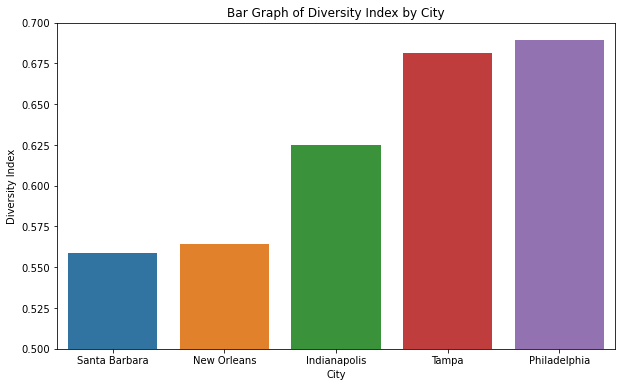

In [67]:
import seaborn as sns
plt.figure(figsize=(10, 6))
city_order = ['Santa Barbara', 'New Orleans', 'Indianapolis', 'Tampa', 'Philadelphia'] 
sns.barplot(x='City', y='DI', data=census_dataset, order=city_order)
plt.title('Bar Graph of Diversity Index by City')
plt.ylim(0.5, 0.7)
plt.xlabel('City')
plt.ylabel('Diversity Index')
plt.show()

In [70]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(stars_city_dict['Philadelphia ch'], stars_city_dict['Tampa ch'], stars_city_dict['Indianapolis ch'], stars_city_dict['New Orleans ch'], stars_city_dict['Santa Barbara ch'])
print(f"One-way ANOVA F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

One-way ANOVA F-statistic: 5.1748171853996885
P-value: 0.0003680610529971969


In [71]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(stars_city_dict['Philadelphia nch'], stars_city_dict['Tampa nch'], stars_city_dict['Indianapolis nch'], stars_city_dict['New Orleans nch'], stars_city_dict['Santa Barbara nch'])
print(f"One-way ANOVA F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

One-way ANOVA F-statistic: 26.43378088484382
P-value: 7.405035241024006e-22
